In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [5]:
# 데이터 불러오기
df = pd.read_csv("../데이터셋/고객db_전처리.csv")

In [6]:
# 차량 구매 서비스 플랫폼 -> 회원 정보, 구매 정보 포함
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,70990000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,50970000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,49890000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,84310000,신용카드,온라인,2,0.011,0.280
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,35670000,현금,오프라인,3,0.047,0.116
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,70990000,계좌이체,온라인,2,0.005,0.304
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,86540000,현금,온라인,2,0.006,0.268


# 일반 고객에게 재구매 할인 혜택 공지

In [71]:
df.loc[df["고객 등급"] == "일반", ["이름", "휴대폰 번호", "이메일"]]

,이름,휴대폰 번호,이메일
0,강주온,010-6502-8753,janisi@himedia.co.kr
3,김민수,010-1234-5678,kimminsu1@himedia.co.kr
4,김승현,010-0123-4567,kimseunghyun20@himedia.co.kr
5,김영철,010-6789-0123,kimyoungcheol6@himedia.co.kr
6,김윤희,010-2345-6789,leesujin2@himedia.co.kr
...,...,...,...
256,윤병철,042-205-5394,wyu@gmail.com
258,오옥자,032-529-6473,hanyeweon@daum.net
260,허경수,063-010-5636,hayungo@yuhanhoesa.com
272,양은주,053-833-2005,cyun@hanmail.net


### 전시장 어디 위치하면 좋을까 : 지역별로 인구밀도가 높을수록, 사람들의 소비가 높을수록 전시장 위치하면 좋겠네?

In [72]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,39240000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,82940000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,70840000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,39250000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,48270000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,83610000,신용카드,온라인,2,0.011,0.280
288,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,37870000,현금,오프라인,3,0.047,0.116
289,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,71580000,계좌이체,온라인,2,0.005,0.304
290,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,89160000,현금,온라인,2,0.006,0.268


In [73]:
df.groupby("거주 지역")["GDP (조 원)"].mean().sort_values(ascending=False)

거주 지역
경기도 성남시     594.0
경기도 수원시     594.0
서울특별시       548.0
충청남도 천안시    143.0
경상남도 창원시    127.0
경상북도 포항시    121.0
인천광역시       117.0
부산광역시       114.0
대구광역시        90.0
전라북도 전주시     88.0
전라남도 목포시     73.0
대전광역시        64.0
충청북도 청주시     54.0
광주광역시        52.0
울산광역시        26.0
Name: GDP (조 원), dtype: float64

# 지금까지 어떻게 팔아왔나?

In [74]:
import plotly.express as px

In [75]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_32963/727121965.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(


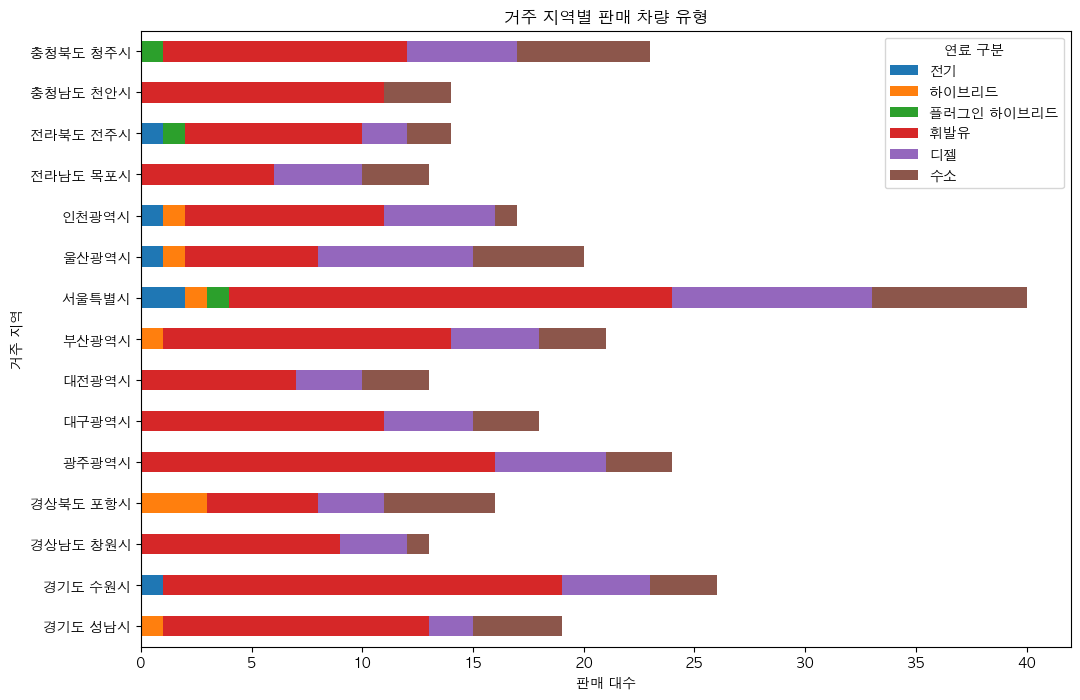

In [76]:
# 연료 구분 정렬 순서 지정
fuel_order = ["전기", "하이브리드", "플러그인 하이브리드", "휘발유", "디젤", "수소"]

# "연료 구분"을 Categorical 타입으로 변경하여 순서 지정
df["연료 구분"] = pd.Categorical(df["연료 구분"], categories=fuel_order, ordered=True)

# 그룹바이 후 연료 구분 순서대로 정렬하여 시각화
df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(
    kind="barh", stacked=True, figsize=(12, 8)
)

plt.title("거주 지역별 판매 차량 유형")
plt.xlabel("판매 대수")
plt.ylabel("거주 지역")
plt.show()

In [77]:
# 차량 구매 건수
# 서울, 수원, 광주, 청주, 울산 등이 높은 편
# 이유 : 인구 밀도가 높은 지역이기 때문

# 전기차 및 하이브리드 차량 구매 건수 : 전반적으로 높지 않음
# 서울, 포항, 울산 등이 그나마 많은 편

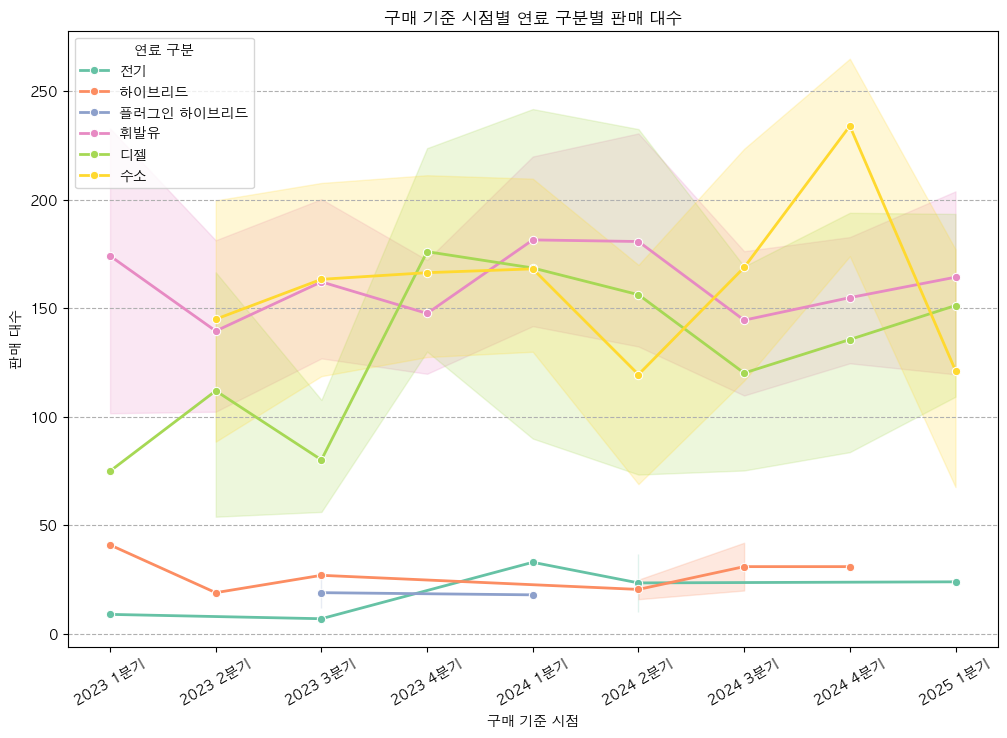

In [78]:
df["구매 기준 시점"] = df["최근 구매 날짜"].str.split("-").str.get(0) + " " + df["최근 구매 시점"]
date_order = ["2023 1분기", "2023 2분기", "2023 3분기", "2023 4분기", "2024 1분기", "2024 2분기", "2024 3분기", "2024 4분기", "2025 1분기"]

df["구매 기준 시점"] = pd.Categorical(df["구매 기준 시점"], categories=date_order, ordered=True)

# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="연료 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [79]:
# 수소차 폭발 2024년 4분기에 잇따라... (https://biz.sbs.co.kr/article/20000208890?division=NAVER)
# 수소차 판매량 2025년 1분기 기점으로 하락세



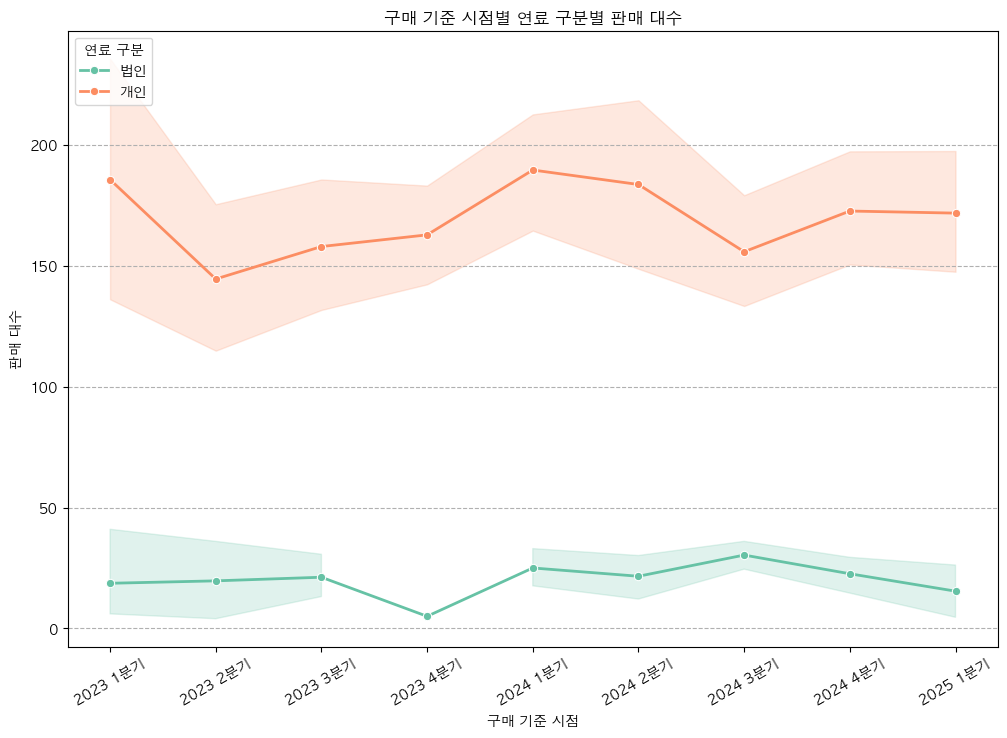

In [80]:
# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="고객 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [81]:
# 2023년 비트코인 가격 상승으로 인해 반도체 부족 현상 발생 (https://www.spglobal.com/mobility/en/info/kr/featured-headlines.html)
# 반도체 부족 현상으로 인해 차량 생산량 감소

# 2024년 2분기 이후도 비트코인 이슈로 인한 반도체 부족 현상 발생

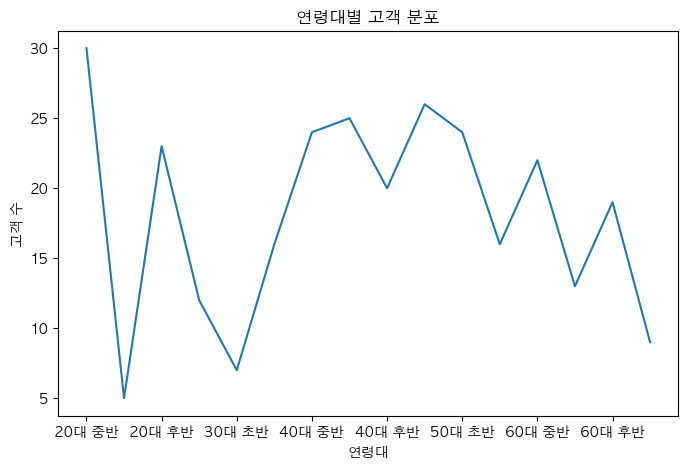

In [82]:
plt.figure(figsize=(8, 5))
df['연령대'].value_counts().sort_index().plot(kind='line')
plt.title("연령대별 고객 분포")
plt.xlabel("연령대")
plt.ylabel("고객 수")
plt.show()

In [83]:
# 40대 진입 이후 차량 구매 수요 증가하는 것으로 파악
# 잠재적 마케팅 대상을 30대 후반~40대 초반으로 설정

In [147]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수,최근 구매 연월
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135,2024-04
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037,2025-02
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004,2025-03
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,평일,689,63,48510000,현금,오프라인,1,0.002,0.130,2023-05
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103,2023-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280,2024-12
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,평일,574,47,39990000,현금,오프라인,3,0.047,0.116,2023-08
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304,2024-01
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,평일,415,40,83040000,현금,온라인,2,0.006,0.268,2024-01


/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_32963/3755540459.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x="연령대", y="차량 구매 횟수", data=df, palette="Set2")


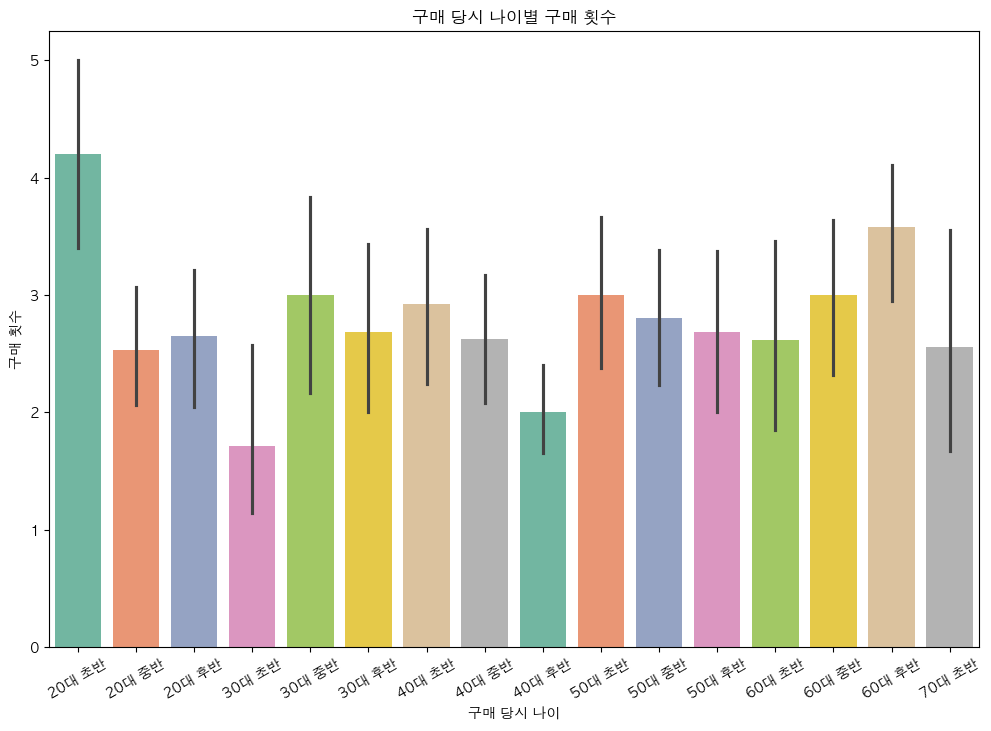

In [93]:
age_order = ["20대 초반", "20대 중반", "20대 후반", "30대 초반", "30대 중반", "30대 후반", "40대 초반", "40대 중반", "40대 후반",
             "50대 초반", "50대 중반", "50대 후반", "60대 초반", "60대 중반", "60대 후반", "70대 초반"]

df["연령대"] = pd.Categorical(df["연령대"], categories=age_order, ordered=True)

# 구매 당시 나이별 구매 횟수를 시각화하기
# 바 플롯으로
plt.figure(figsize=(12, 8))
sb.barplot(x="연령대", y="차량 구매 횟수", data=df, palette="Set2")
plt.title("구매 당시 나이별 구매 횟수")
plt.xlabel("구매 당시 나이")
plt.ylabel("구매 횟수")
plt.xticks(rotation=30)
plt.show()

In [ ]:
# 잠재적인 고객층 분석 : 약 15년 주기로 차량을 교체하는 양상

# 20대 초반에 구매 횟수가 가장 많음
# 30대 중반에도 구매 횟수가 높은 편
# 50대 초반에도 구매 횟수가 증가하는 경향성
# 60대 후반에 구매 횟수 대폭 상승
    # 회장님 나이대의 차량 구매라고 볼 수 있음

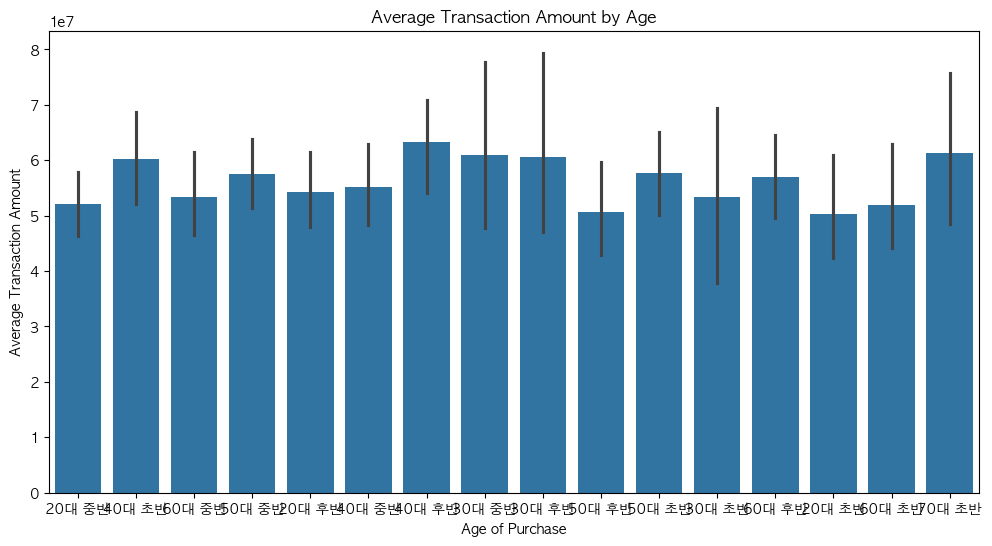

In [87]:
# 구매 당시 나이별 구매 금액을 시각화하기
# 바 플롯으로, 평균 구매 금액
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="연령대", y="최근 거래 금액")
plt.xlabel("Age of Purchase")
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount by Age")
plt.show()

In [ ]:
# 30대 중반에 구매 금액이 가장 높음

<Figure size 1200x600 with 0 Axes>

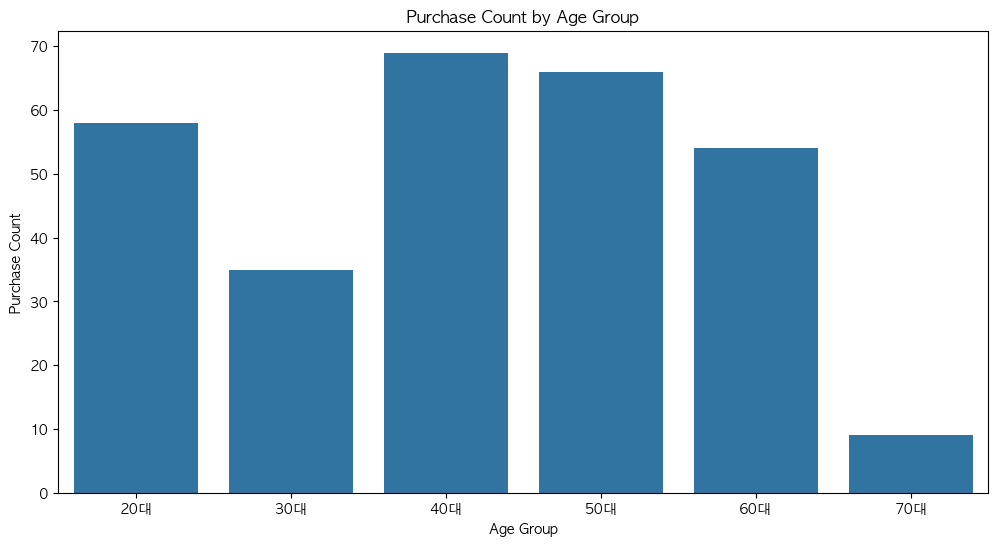

In [76]:
# 연령대별 구매 횟수를 시각화하기
# 바 플롯으로

# 연령대의 오름차순 정렬을 위해 정렬된 리스트 생성
age_order = sorted(df["연령대"].unique())

# 바 플롯 생성
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="연령대", order=age_order)
plt.xlabel("Age Group")
plt.ylabel("Purchase Count")
plt.title("Purchase Count by Age Group")
plt.show()